# EXPLORATORY DATA ANALYSIS
First we explore the data in order de understands what we have and the statistical properties of the dataset

# DATA DICTIONNARY 

1. age: age in years
2. sex: sex
    - 1 = male
    - 0 = female
3. cp: chest pain type
     - Value 0: typical angina
     - Value 1: atypical angina
     - Value 2: non-anginal pain
     - Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)
    - 1 = true;
    - 0 = false
7. restecg: resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina
    - 1 = yes
    - 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal:
    - 0 = error (in the original dataset 0 maps to NaN's)
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversable defect
14. target (the lable):
    - 0 = no disease,
    - 1 = disease


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Get the data Ready
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
pd.set_option("display.max_row",14)
pd.set_option("display.max_column",303)

In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#verify is the dataset contains NaN values
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
#check if the dataset has duplicated values
data.duplicated().sum()

1

In [9]:

data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

# TARGET VISUALIZATION

In [11]:
#make a copy of the original dataset
df = data.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: ylabel='output'>

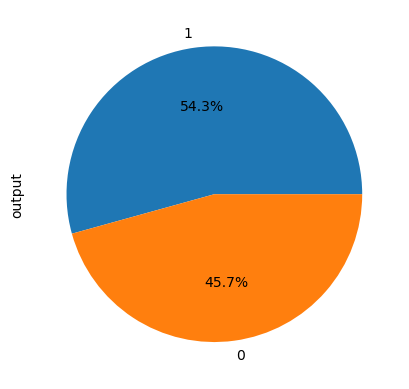

In [12]:
df.output.value_counts().plot.pie(autopct="%1.1f%%")

- Target variable is fairly balanced, 54% no-disease to 46% has-disease

# DISTRIBUTION OF NUMERICAL VARIABLES

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
#split the dataset into categorical and numerical variables
categorie = df[["sex","cp","fbs","restecg","exng","slp","thall","output"]]
numeric = df[["age","trtbps","chol","thalachh","oldpeak","caa"]]

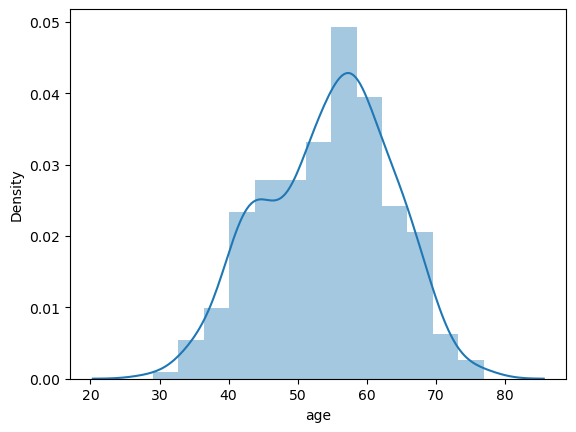

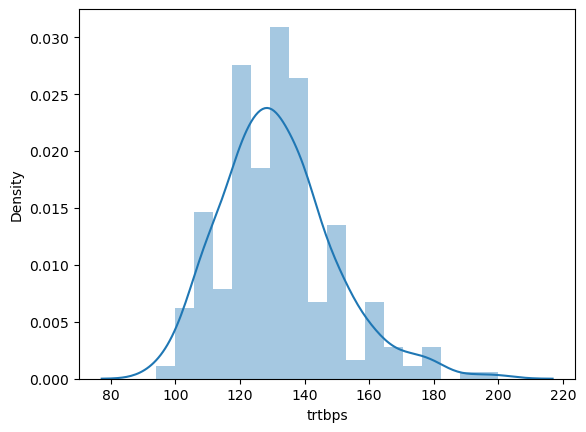

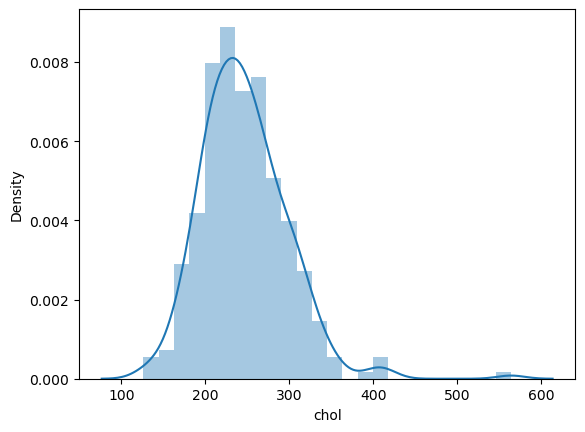

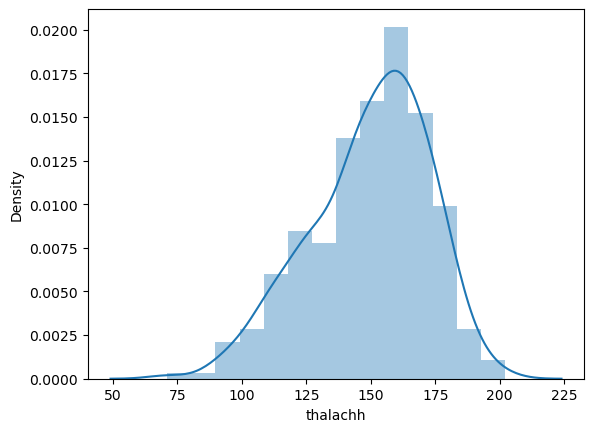

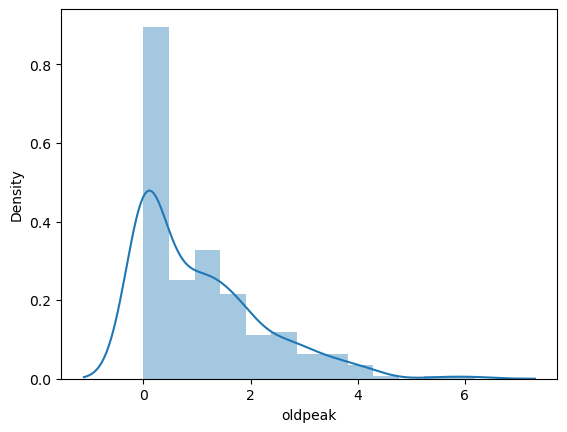

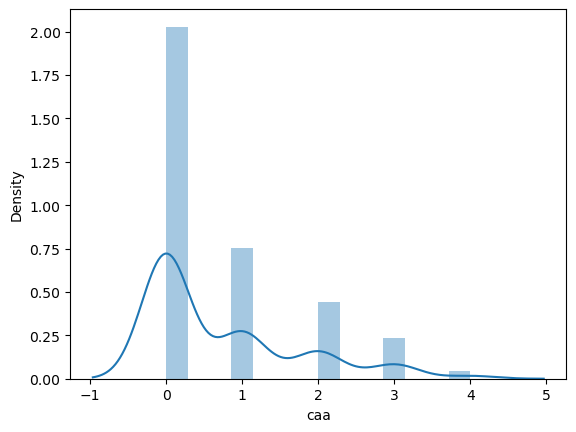

In [15]:

for col in numeric:
    plt.figure()
    sns.distplot(df[col])

# QUALITATIVE VARIABLES

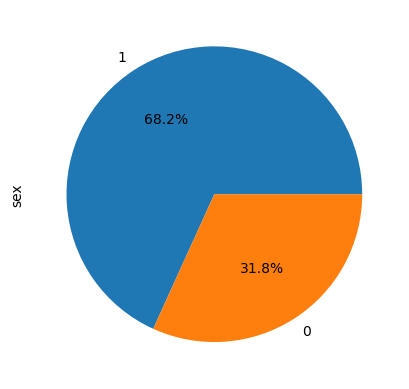

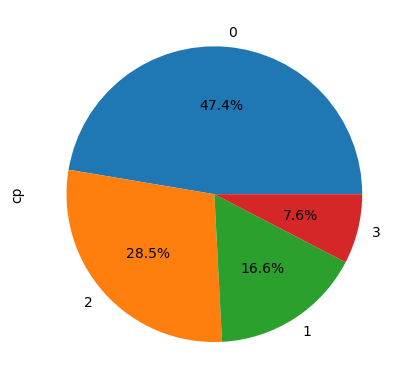

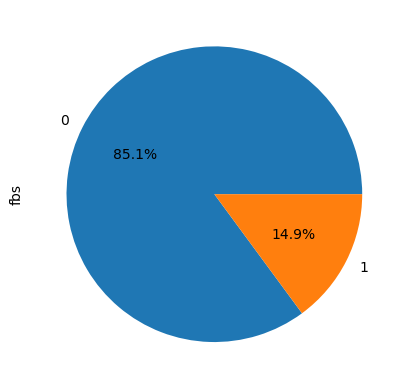

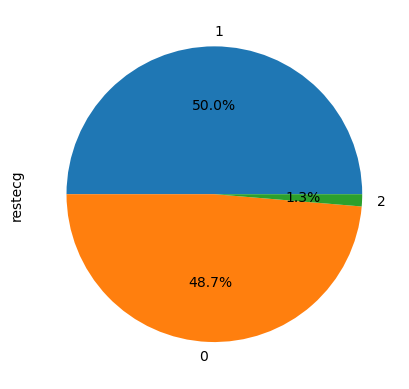

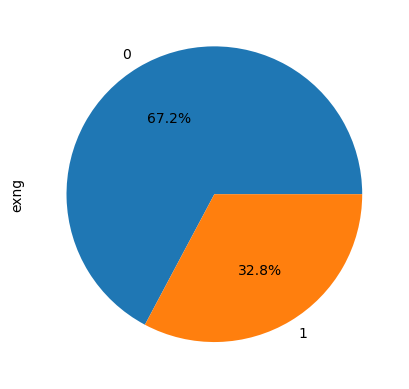

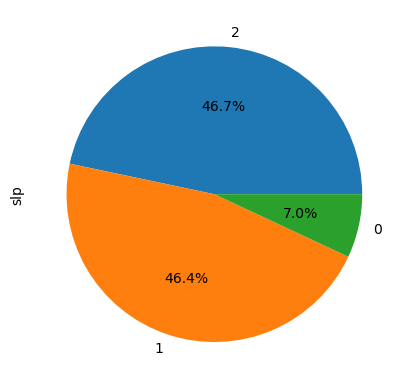

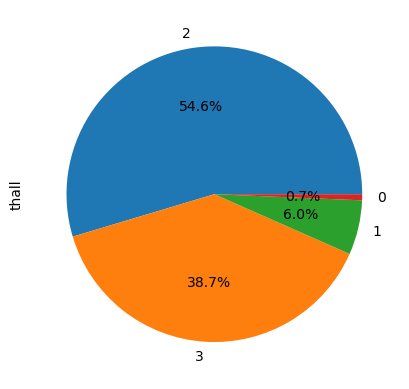

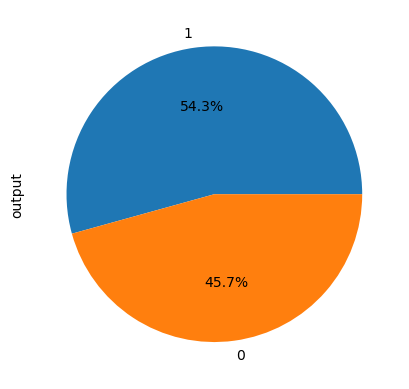

In [16]:
#have a global idea of the categorical variables
for col in categorie:
    plt.figure()
    df[col].value_counts().plot.pie(autopct = "%1.1f%%")

# EXPLORING TARGET FEATURES


In [17]:
#Création de sous ensemble
lessattack = df[df["output"]==0]
moreattack = df[df["output"]==1]

# TARGET / NUMERIC

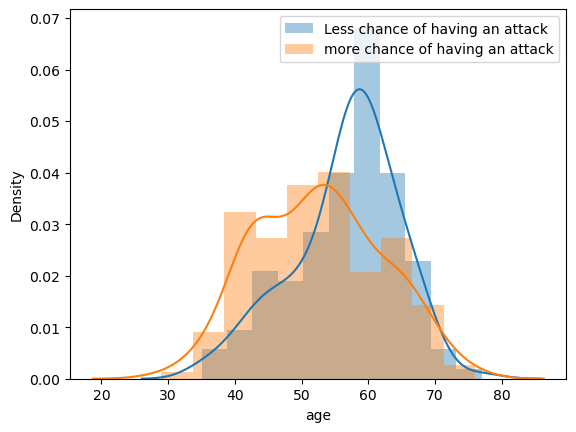

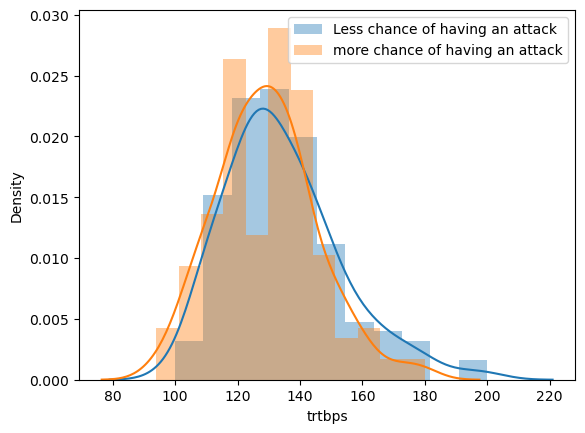

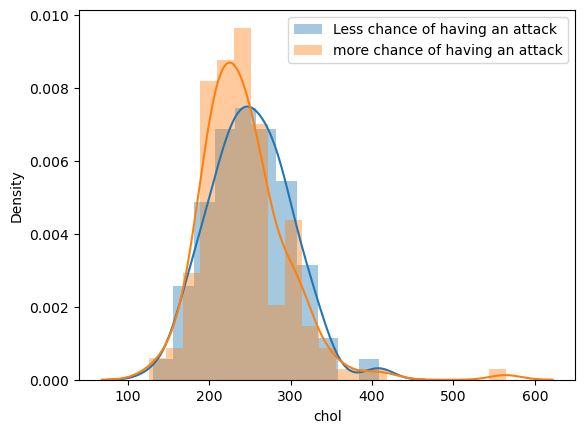

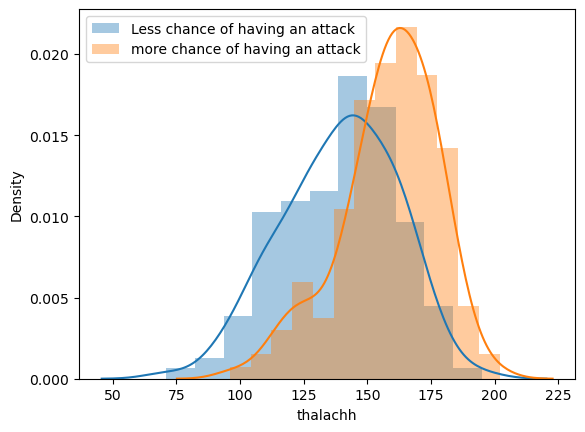

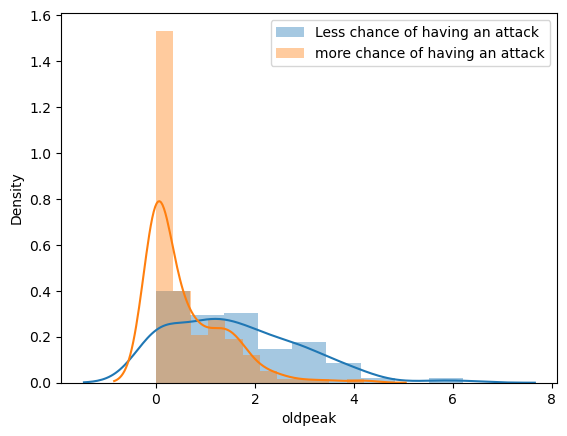

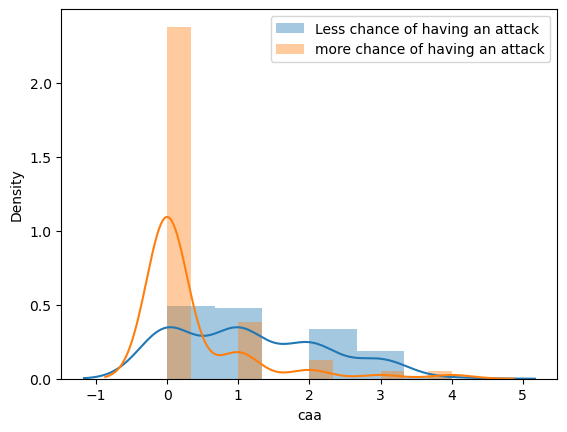

In [18]:
for col in numeric:
    plt.figure()
    sns.distplot(lessattack[col], label = 'Less chance of having an attack')
    sns.distplot(moreattack[col], label = 'more chance of having an attack')
    plt.legend()

# TARGET / CATEGORY

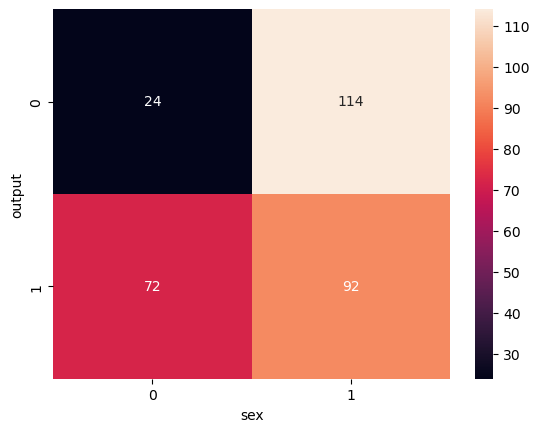

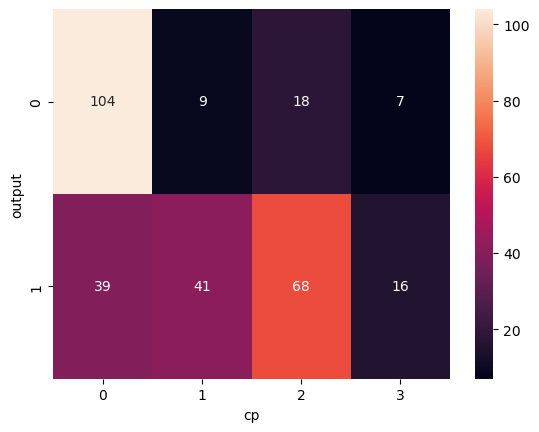

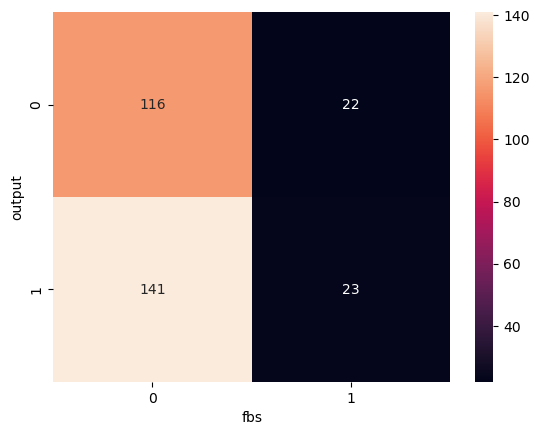

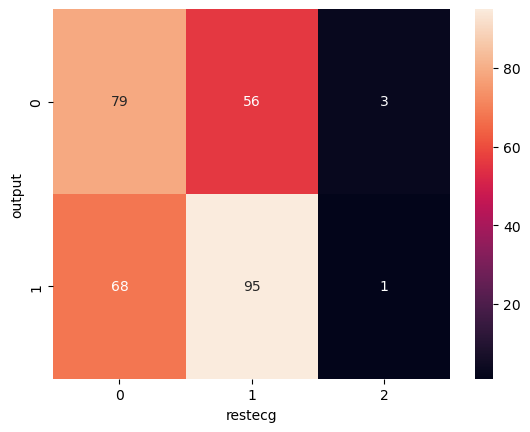

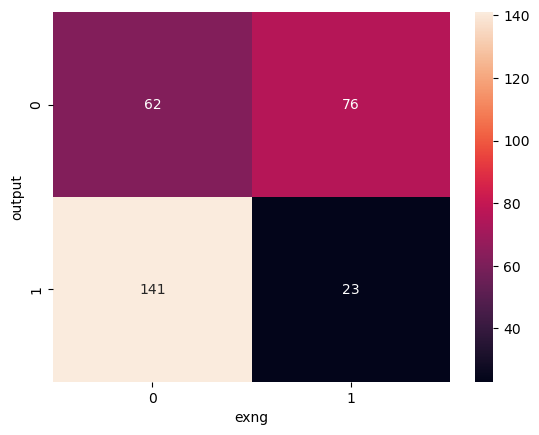

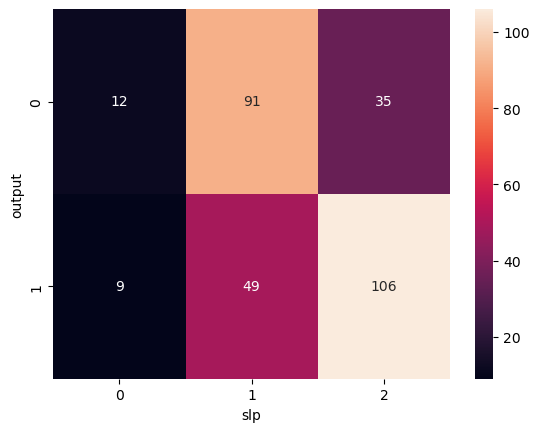

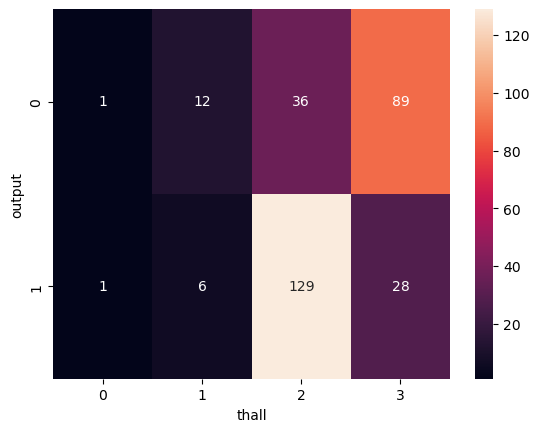

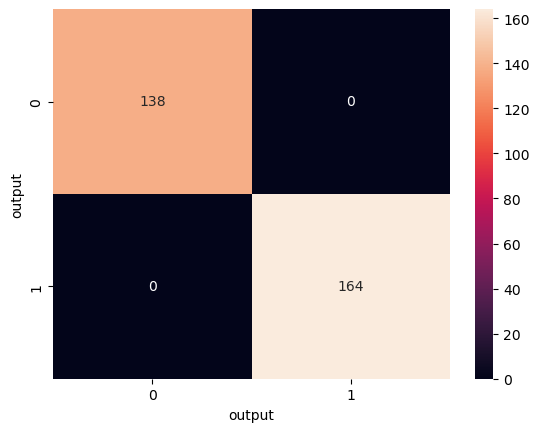

In [19]:
for col in categorie:
    plt.figure()
    sns.heatmap(pd.crosstab(df.output, df[col]), annot=True, fmt="d")

# CORRELATION BETWEEN VARIABLES

<Axes: >

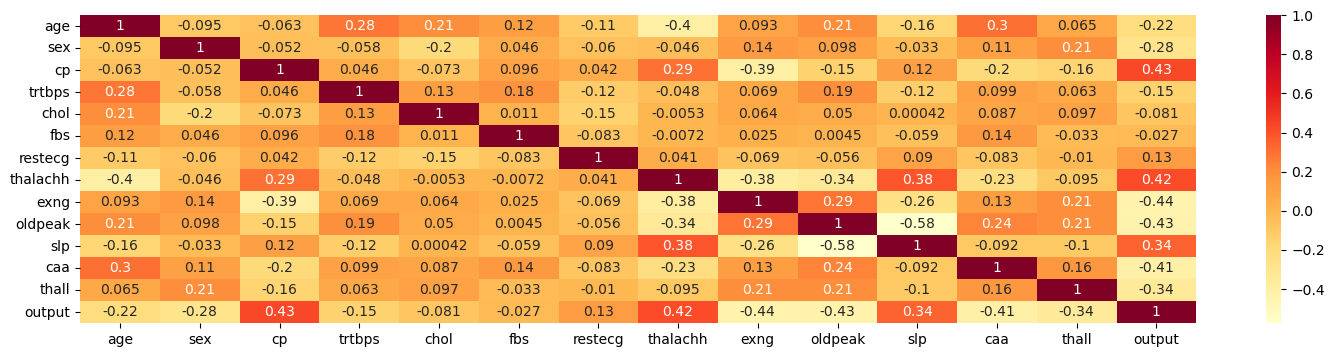

In [20]:
plt.figure(figsize=(18,4))
sns.heatmap(df.corr(), annot=True, cmap ='YlOrRd')

<Axes: xlabel='cp'>

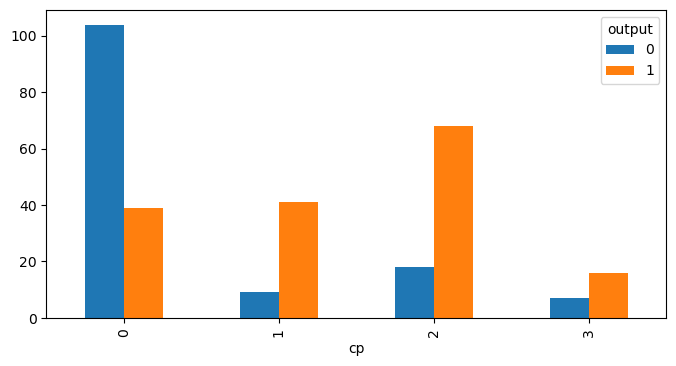

In [21]:
pd.crosstab(df.cp, df.output).plot(kind="bar", figsize=(8,4))

<Axes: xlabel='exng'>

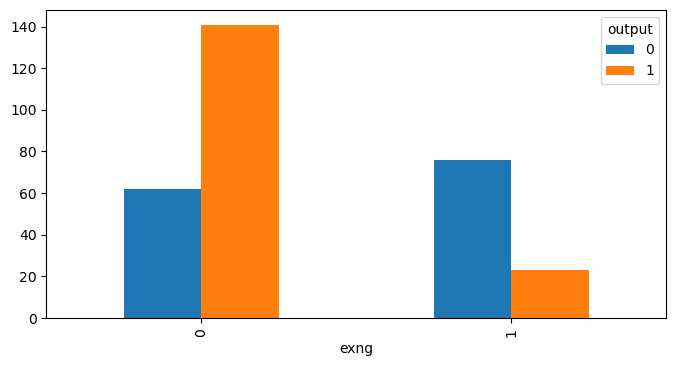

In [22]:
pd.crosstab(df.exng, df.output).plot(kind="bar", figsize=(8,4))

<Axes: xlabel='fbs'>

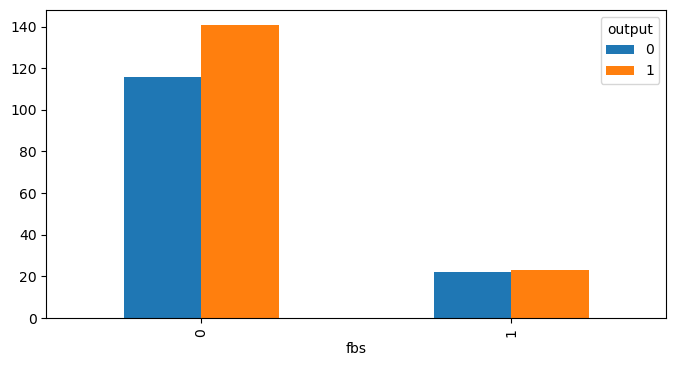

In [23]:
pd.crosstab(df.fbs, df.output).plot(kind="bar", figsize=(8,4))

<Axes: xlabel='restecg'>

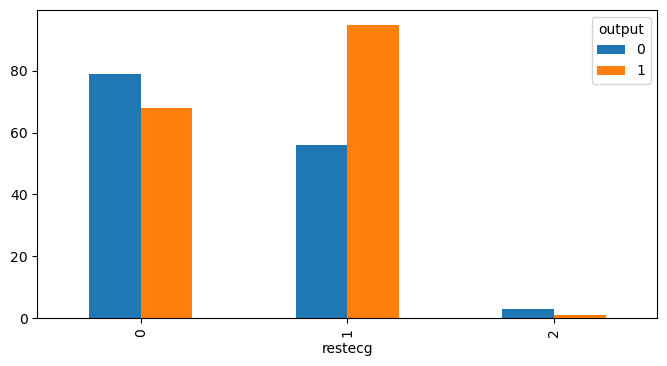

In [24]:
pd.crosstab(df.restecg, df.output).plot(kind="bar", figsize=(8,4))

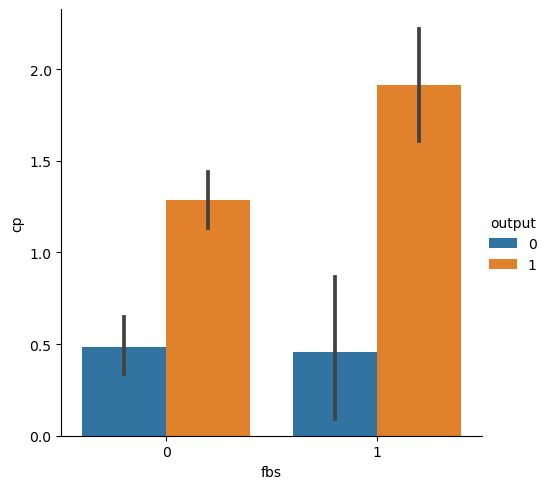

In [25]:
sns.catplot(y="cp", x="fbs", hue="output", kind="bar", data=df)

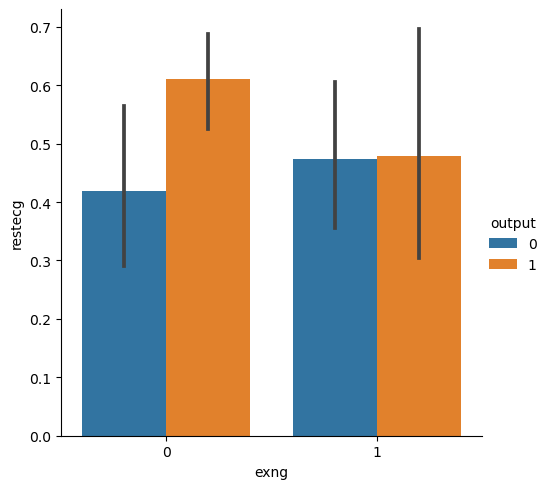

In [26]:
sns.catplot(y="restecg", x="exng", hue="output", kind="bar", data=df)

<Axes: xlabel='caa'>

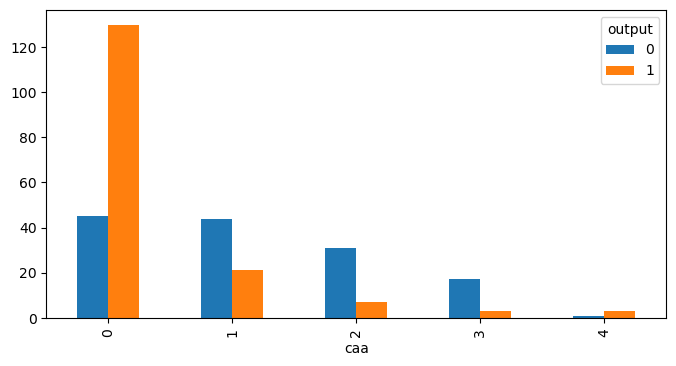

In [27]:
pd.crosstab(df.caa, df.output).plot(kind='bar', figsize=(8,4))

<Axes: xlabel='caa', ylabel='thalachh'>

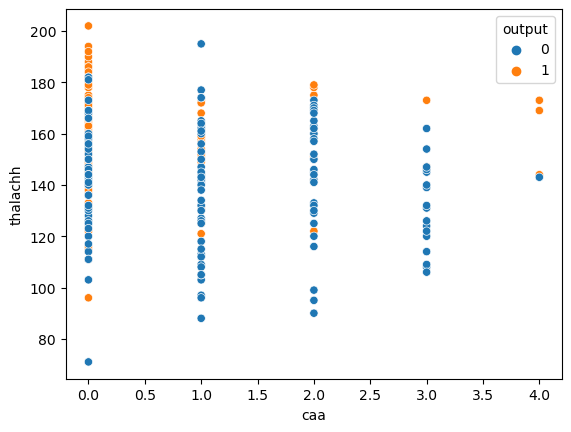

In [28]:
sns.scatterplot(x="caa", y='thalachh', hue='output',  data=df)

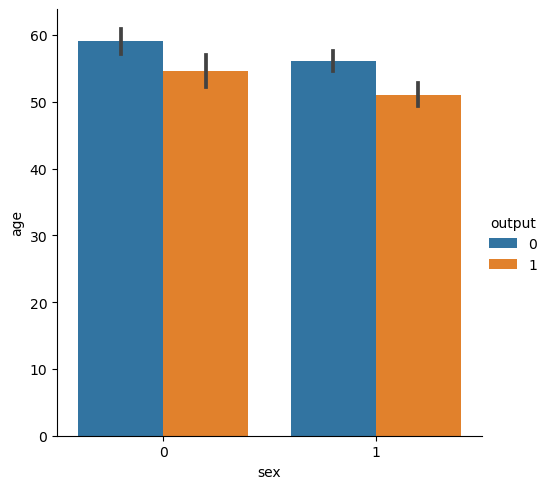

In [29]:
sns.catplot(x="sex", y='age', kind="bar", hue='output',  data=df)

In [30]:
pd.crosstab(df.sex, df.output)

output,0,1
sex,,
0,24,72
1,114,92


In [31]:
from scipy.stats import ttest_ind

In [32]:
lessattack.shape

(138, 14)

In [33]:
moreattack.shape

(164, 14)

In [34]:
balanced = moreattack.sample(lessattack.shape[0])

In [35]:
def t_test(col):
    alpha=0.02
    stat,p=ttest_ind(balanced[col],lessattack[col])
    if p < alpha :
        return 'H0 Rejected'
    else:
        return 0


In [36]:
for col in numeric:
    print(f'{col:-<50}{t_test(col)}')

age-----------------------------------------------H0 Rejected
trtbps--------------------------------------------0
chol----------------------------------------------0
thalachh------------------------------------------H0 Rejected
oldpeak-------------------------------------------H0 Rejected
caa-----------------------------------------------H0 Rejected


In [37]:
for col in categorie:
    print(f'{col:-<50}{t_test(col)}')

sex-----------------------------------------------H0 Rejected
cp------------------------------------------------H0 Rejected
fbs-----------------------------------------------0
restecg-------------------------------------------H0 Rejected
exng----------------------------------------------H0 Rejected
slp-----------------------------------------------H0 Rejected
thall---------------------------------------------H0 Rejected
output--------------------------------------------H0 Rejected


# PRE-PROCESSING

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X= df.drop(["output"], axis=1)
y= df["output"]

In [40]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2, random_state=0)

# MODEL

In [41]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
rdf = RandomForestClassifier()
ada = AdaBoostClassifier()
tree = DecisionTreeClassifier()
logreg = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
svm = make_pipeline(StandardScaler(), SVC())

In [43]:
dictio = {
    "RandomForestClassifer":rdf,
    "AdaBoostClassifier":ada,
    "DecisionTreeClassifier":tree,
    "LogisticRegression": logreg,
    "SVM":svm
    
}

In [44]:
def evaluation(model):
    model.fit(xtrain, ytrain)
    print(model.score(xtest, ytest))
    ypred=model.predict(xtest)
    print(confusion_matrix(ytest, ypred))
    print(classification_report(ytest, ypred))
    
    N, train_score, val_score = learning_curve(model, xtrain,ytrain, cv=5, scoring="f1", train_sizes=np.linspace(0.1,1,10))
    plt.figure()
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label="validation score")
    plt.legend()

RandomForestClassifer
0.9016393442622951
[[24  3]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

AdaBoostClassifier
0.9180327868852459
[[25  2]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

DecisionTreeClassifier
0.7868852459016393
[[22  5]
 [ 8 26]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    

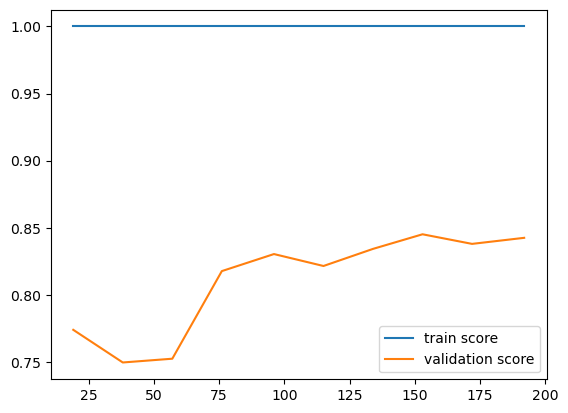

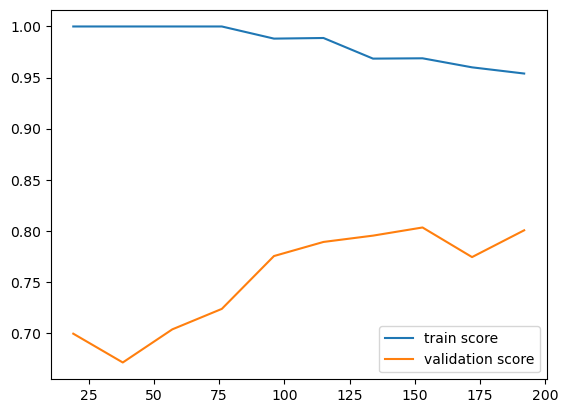

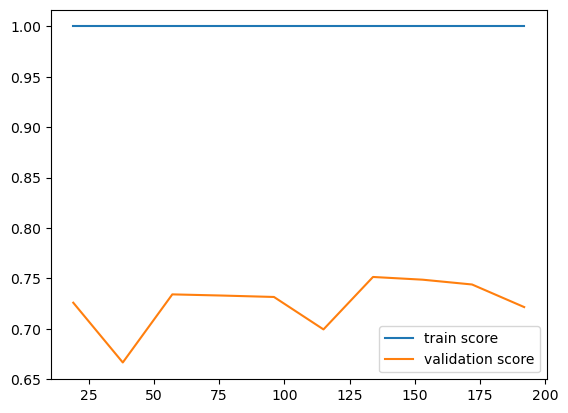

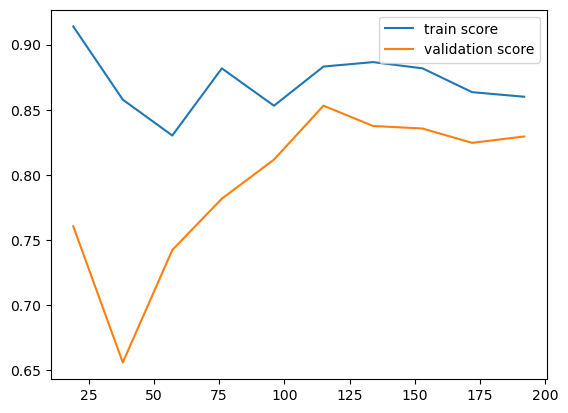

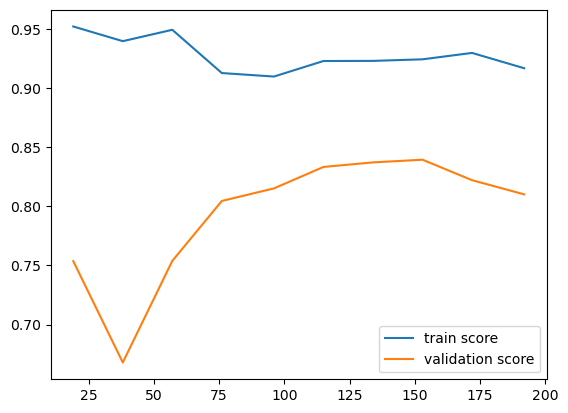

In [45]:
for name, model in dictio.items():
    print(name)
    evaluation(model)

# SVM

In [46]:
svm.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [47]:
params = {
    'svc__gamma':np.arange(0.001,100,10),
    'svc__C': np.arange(0.01,100,10),
    'svc__kernel': ['linear','rbf']
}

In [48]:
grid = RandomizedSearchCV(svm, params, scoring="f1" ,cv=5, n_iter=50)

grid.fit(xtrain, ytrain)
print(grid.score(xtest, ytest))
print(grid.best_params_)
ypredict = grid.predict(xtest)

print(classification_report(ytest, ypredict))

0.8695652173913043
{'svc__kernel': 'linear', 'svc__gamma': 30.001, 'svc__C': 90.01}
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



0.8524590163934426
[[22  5]
 [ 4 30]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



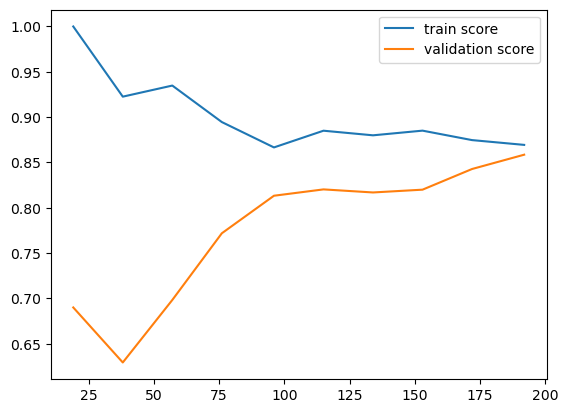

In [49]:
evaluation(grid.best_estimator_)

In [50]:
precision, recall, threshold = precision_recall_curve(ytest, grid.best_estimator_.decision_function(xtest))

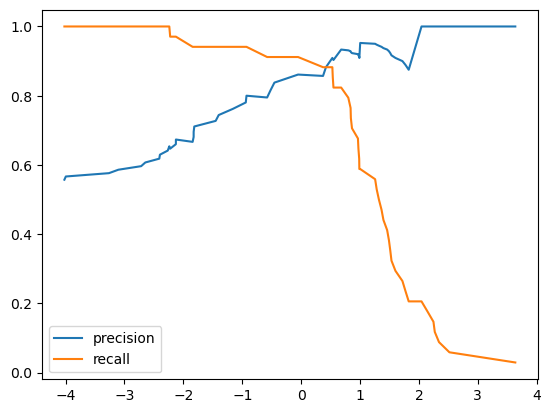

In [51]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [52]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [53]:
y_pred = model_final(grid.best_estimator_, xtest, threshold=0.5)

In [54]:
f1_score(ytest, y_pred)

0.8955223880597014

In [55]:
recall_score(ytest, y_pred)

0.8823529411764706

In [56]:
precision_score(ytest, y_pred)

0.9090909090909091

In [57]:
accuracy_score(ytest, y_pred)

0.8852459016393442

In [58]:
svm2 = SVC(gamma= 80.001, C = 40.01, kernel="linear")
svm2.fit(xtrain,ytrain)

SVC(C=40.01, gamma=80.001, kernel='linear')

In [59]:
svm2.coef_

array([[ 0.01551454, -2.48171748,  0.84310084, -0.02233679, -0.00301711,
         0.37114579,  0.44113396,  0.01962099, -1.03653201, -0.37143166,
         0.73895049, -1.02586071, -0.75262511]])

In [60]:
feature_dict = dict(zip(df.columns, list(svm2.coef_[0])))
feature_dict

{'age': 0.015514544776522143,
 'sex': -2.4817174812256866,
 'cp': 0.8431008418248567,
 'trtbps': -0.022336787373262723,
 'chol': -0.003017109773956861,
 'fbs': 0.3711457938071163,
 'restecg': 0.44113396159356455,
 'thalachh': 0.01962098916443722,
 'exng': -1.0365320146235177,
 'oldpeak': -0.3714316575104263,
 'slp': 0.7389504874612669,
 'caa': -1.0258607109459916,
 'thall': -0.7526251085204834}

<Axes: title={'center': 'Feature Importance'}>

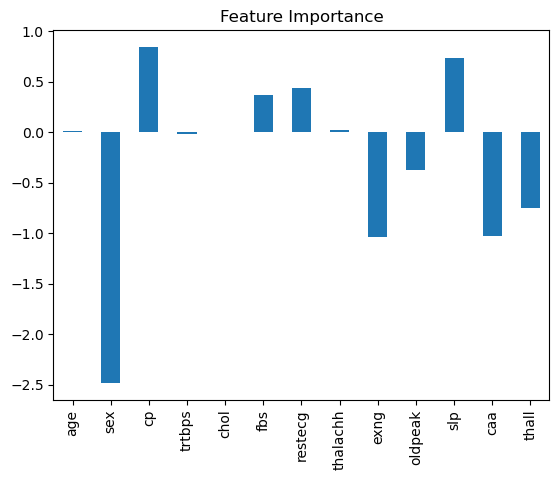

In [61]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False)

# LOGISTIC REGRESSION

In [62]:
logreg.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [63]:
lparams = {
    'logisticregression__solver': ['lbfgs','liblinear'],
    'logisticregression__penalty': ['l2','l1'],
    'logisticregression__C': np.logspace(-4,4,30)
}

In [64]:
unegrid = RandomizedSearchCV(logreg, lparams, scoring="f1" ,cv=5, n_iter=50)

unegrid.fit(xtrain, ytrain)
print(unegrid.score(xtest, ytest))
print(unegrid.best_params_)
y_predict = unegrid.predict(xtest)

print(classification_report(ytest, y_predict))

0.8857142857142858
{'logisticregression__solver': 'lbfgs', 'logisticregression__penalty': 'l2', 'logisticregression__C': 0.03039195382313198}
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



0.8688524590163934
[[22  5]
 [ 3 31]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



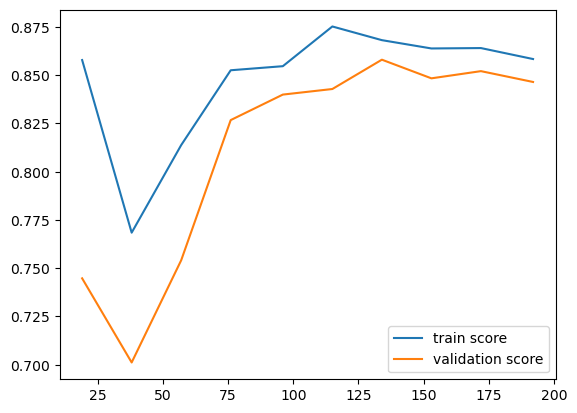

In [65]:
evaluation(unegrid.best_estimator_)

In [66]:
precision, recall, threshold = precision_recall_curve(ytest, unegrid.best_estimator_.decision_function(xtest))

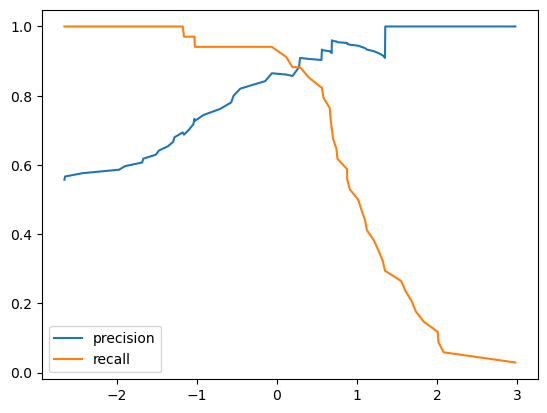

In [67]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [68]:
def lemodel_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [69]:
y_preds = lemodel_final(unegrid.best_estimator_, xtest, threshold=0.15)

In [70]:
recall_score(ytest, y_preds)

0.8823529411764706

In [71]:
precision_score(ytest, y_preds)

0.8571428571428571

In [72]:
accuracy_score(ytest, y_preds)

0.8524590163934426

In [73]:
logreg2 = LogisticRegression(solver ='liblinear', penalty= 'l2', C = 0.004520353656360241)
logreg2.fit(xtrain,ytrain)

LogisticRegression(C=0.004520353656360241, solver='liblinear')

In [74]:
features_dict = dict(zip(df.columns, list(logreg2.coef_[0])))
features_dict

{'age': -0.007946384800255274,
 'sex': -0.07853962254588738,
 'cp': 0.13539233465155018,
 'trtbps': -0.020319884234667192,
 'chol': -0.0024628941989196843,
 'fbs': 0.002150633294428609,
 'restecg': 0.008432232110200388,
 'thalachh': 0.028208516972970644,
 'exng': -0.059115959956590164,
 'oldpeak': -0.12218708187144213,
 'slp': 0.04044265005392157,
 'caa': -0.13705546565552199,
 'thall': -0.08597234524383099}

<Axes: title={'center': 'Feature Importance'}>

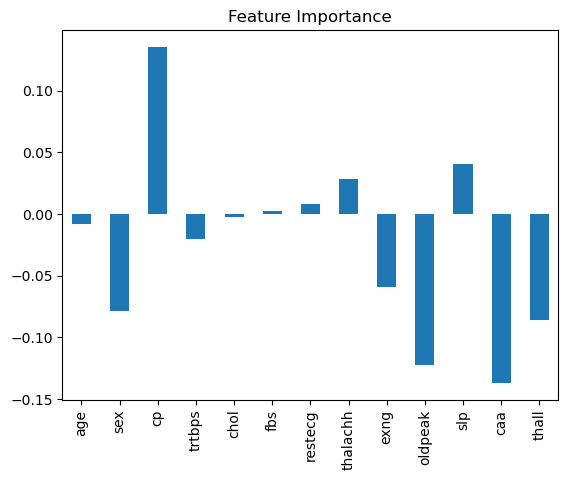

In [75]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title='Feature Importance', legend=False)